# Busqueda por Amplitud

A continuacion se ejemplifica la busqueda por amplitud revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano.


In [87]:
# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [110]:
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
        'Latacunga': {'Ambato', 'Quito'},
        'Esmeraldas': {'Manta'},
        'Manta': {'Guayaquil'},
        'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
        'Riobamba': {'Cuenca', 'Quito'},
        'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
        'Puyo': {'Ambato', 'Quito'},
        'Machala': {'Guayaquil'},
        'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'}
    }

    init_state = 'Manta'
    solution = 'Quito'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")
       

['Manta', 'Guayaquil', 'Quito']


# Tarea: Cálculo del factor de ramificación
Realice el cálculo del factor de ramificación del problema de las N reinas (con N = 4). Para ello deberá realizar las siguientes actividades:

Asumir que el factor de ramificación es constante.
Despejar el valor de b
Consultar sitios externos sobre cómo realizar el cálculo

# Solucion:

para calcular el factor de ramificacion par ael problema de las N reinas, es este caso seran igual a 4.

n=4 por el numero de reinas es decir los nodos que tendremos y de los cuales se procederan a encontrar la solucion
y para el ejercicio romaremos un profundidad equivalente a 2 es decir el nivel en el que se encontrara nuetro arbol de solucion
d=2

n=((b^(3)-1)/(b-1)

4=((b-1)(b^(2) + b + 1)/(b-1)

b^(2)+b-3 = 0

aplicamos la formula general para la solucion 

b = (-1 + raiz(1^(2) - 4 * 1(3)))/2

b = (-1 + raiz(13))/2

si remplazamos el valor en la ecuacion de b obetenmos una igualdad.


In [70]:
# Agregar la solucion en markdown (Informe)

## Practica

Implementar un algoritmo que me permita dibujar las conexiones y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

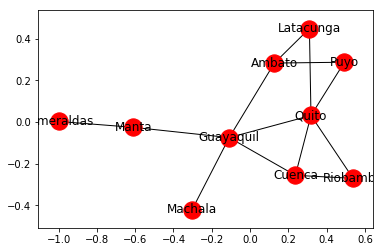

In [89]:
# Implementar
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
G = nx.Graph() 
G.add_nodes_from(connections)

for key, lista in connections.items():
    for i in lista:
        G.add_edge(key,i)
nx.draw_networkx(G, with_label = True)



<img src="mapahospitales.png">


# Calculo del factor de ramificacion

para realizar el clculo del factor de ramificacion para el problema de los hospitales tomamos los mismos como nodos es decir para nuestro caso tenemos 18 hospitales y nuestra casa como punto de partida que serian los nodos

n = 19

y la profundidad seran los niveles en los ques se procedio a realizar el arbol

d = 6

siguiendo la formula del calculo del factor de ramificacion obtenemos que para este problema 

n=((b^(d+1)-1)/(b-1)

19=((b^(7)-1)/(b-1)

b = 1.33





In [72]:
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution2(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)
        
if __name__ == "__main__":
    connections2 = {
        'casa': {'HopitalprivadoUNIREAS', 'Centrodesaludcarloselizalde'},
        'Centrodesaludcarloselizalde' : {'casa'},
        'HopitalprivadoUNIREAS': {'clinicahumanitaria', 'clinicacisneros', 'casa'},
        'clinicacisneros': {'clinicasantaines', 'hospitalmontesinai'},
        'clinicahumanitaria': {'clincalatino'},
        'clincalatino': {'clinicapraxxel', 'hospitalsanmartindeporres', 'hospitalbolivar'},
        'clinicapraxxel' : {'clincalatino'},
        'hospitalsanmartindeporres' : {'clincalatino'},
        'hospitalbolivar' : {'clincalatino'},
        'clinicasantaines': {'DispensarioMedicodeIEES'},
        'hospitalmontesinai': {'Hospitalsanjunadedios', 'HospitalOdontologicoODONTHOS'},
        'DispensarioMedicodeIEES': {'hospitalUniversitarioCatolico', 'CentroMedicoSanBlas'},
        'hospitalUniversitarioCatolico' : {'DispensarioMedicodeIEES'},
        'CentroMedicoSanBlas' : {'DispensarioMedicodeIEES'},
        'Hospitalsanjunadedios': {'IEEScentrodesaludCmateronoinfantil'},
        'HospitalOdontologicoODONTHOS': {'hospitalvicentecorralmoscoso'},
        'IEEScentrodesaludCmateronoinfantil': {'HospitalRegionaljoseCarrascoArteaga'},
        'hospitalvicentecorralmoscoso' : {'HospitalOdontologicoODONTHOS'},
        'HospitalRegionaljoseCarrascoArteaga' : {'IEEScentrodesaludCmateronoinfantil'}
    }

    init_state = 'casa'
    solution = 'clincalatino'
    solution_node = search_Amplitud_solution2(connections2, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")
       
       

['casa', 'HopitalprivadoUNIREAS', 'clinicahumanitaria', 'clincalatino']


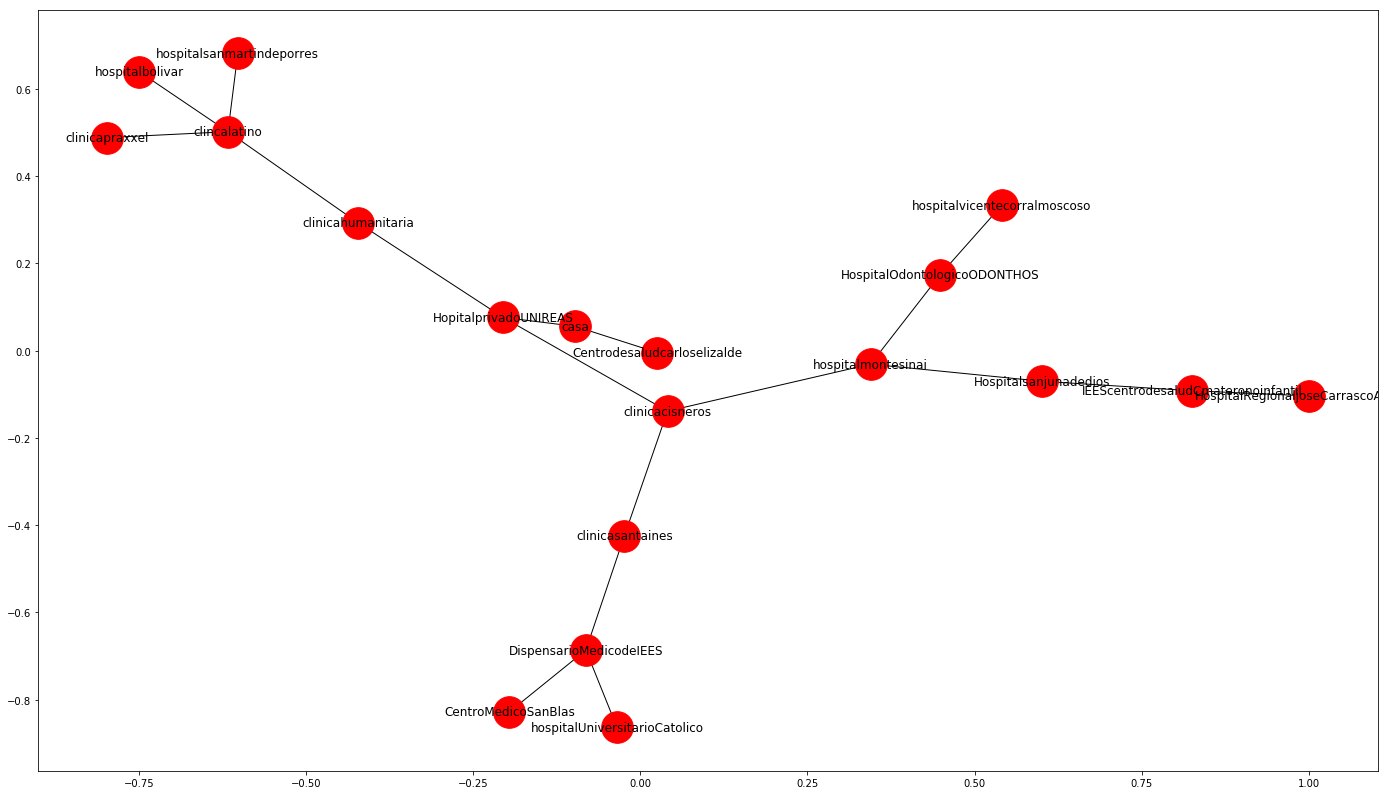

In [73]:
G2 = nx.Graph()
G2.add_nodes_from(connections2)

for key, lista in connections2.items():
    for i in lista:
        G2.add_edge(key,i)

plt.figure(3,figsize=(24,14)) 
nx.draw_networkx(G2, with_label = True, node_size=1000)
plt.show()